In [2]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
#from keras.layers.convolutional import Conv2D
#from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from keras.models import load_model
import pandas as pd
import numpy as np
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from os import listdir
from sklearn.metrics import roc_curve

from sklearn.metrics import auc

from scipy.stats import sem
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [3]:
def get_train_test(data, max_id):
    train_data = data[data[0]<max_id]
    test_data = data[data[0]>=max(max_id,500)]
    #print(train_data.shape)
    #print(test_data.shape)
    train_features = train_data.iloc[:,22:622]
    test_features = test_data.iloc[:,22:622]
    train_features_18 = train_data[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
    test_features_18 = test_data[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
    train_labels = train_data.iloc[:,622]
    test_labels = test_data.iloc[:,622]
    train_features_arr = train_features.as_matrix()
    test_features_arr = test_features.as_matrix()
    train_features_reshaped = train_features_arr.reshape(train_data.shape[0],60,10)
    test_features_reshaped = test_features_arr.reshape(test_data.shape[0],60,10)
    #print(train_features_reshaped.shape)
    #print(test_features_reshaped.shape)
    return train_features_reshaped,test_features_reshaped,train_labels, test_labels, train_features_18, test_features_18

In [4]:
def get_hot_value(my_list):
    max_val = max(my_list)
    return [int(item == max_val) for item in my_list]
def test_lstm_multi(test_features_reshaped,test_features_18, test_labels, pickle_name):
    
    model = load_model(pickle_name)
    
    #X = test_features
    y = np.array(test_labels)
    #le = preprocessing.LabelEncoder()
    #y = le.fit_transform(y)

    y = y.reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(y)
    
    #Evaluate the model
    scores = model.evaluate([test_features_18,test_features_reshaped], y, verbose=1)
    predicted_labels = model.predict([test_features_18,test_features_reshaped])

    print("Accuracy: ", scores[1]*100)

    hot_list = [get_hot_value(sublist) for sublist in predicted_labels]

    #t  = np.array(y)
    #p  = np.array(hot_list)
    #t = np.argmax(t, axis=1)
    #p = np.argmax(p, axis=1)

    #print("Precision: ", precision_score(t, p, average=None))
    
    return hot_list, ohe, predicted_labels

In [5]:
model_folder_10cells = 'multi_input_models_10cells/'
data = pd.read_csv("data/data/train_data_final_50k.csv", header = None)

In [6]:
models_10cells = listdir(model_folder_10cells)

In [7]:
models_10cells[:6]

['19678_weights.best_10cells.hdf5',
 '27461_weights.best_10cells.hdf5',
 '29835_weights.best_10cells.hdf5',
 '37210_weights.best_10cells.hdf5',
 '42507_weights.best_10cells.hdf5',
 '42920_weights.best_10cells.hdf5']

In [6]:
max_ids = [200,300,350,400,450,500]
i = 0
for model in models_10cells[:6]:
    train_data_size = int(model[:5])
    print(train_data_size)
    max_id = max_ids[i]
    i+=1
    print(model)
    train_features_reshaped,test_features_reshaped,train_labels, test_labels, train_features_18, test_features_18 = get_train_test(data,max_id)
    lstm_predicted_labels,ohe,predicted_probs = test_lstm_multi(test_features_reshaped, test_features_18,test_labels.as_matrix(),model_folder_10cells+model)
    fpr,tpr,thresholds = roc_curve(test_labels.as_matrix(), predicted_probs[:,1])
   
    auc_num = auc(fpr, tpr)
    print(auc_num)
    
    
    
    
    

19678
19678_weights.best_10cells.hdf5
7080/7080 [==============================] - 7s 980us/step
Accuracy:  70.7768361581921
0.8108740263678471
27461
27461_weights.best_10cells.hdf5
7080/7080 [==============================] - 6s 819us/step
Accuracy:  76.17231638418079
0.818912396434103
29835
29835_weights.best_10cells.hdf5
7080/7080 [==============================] - 6s 865us/step
Accuracy:  73.10734463276836
0.7962269370550978
37210
37210_weights.best_10cells.hdf5
7080/7080 [==============================] - 7s 1ms/step
Accuracy:  75.6638418079096
0.809727364109833
42507
42507_weights.best_10cells.hdf5
7080/7080 [==============================] - 6s 880us/step
Accuracy:  76.53954802259886
0.8102283205725932
42920
42920_weights.best_10cells.hdf5
7080/7080 [==============================] - 6s 903us/step
Accuracy:  76.34180790960453
0.8090821405444487
47512
47512_weights.best_10cells.hdf5
2488/2488 [==============================] - 2s 977us/step
Accuracy:  85.20900321543408
0.94832860

In [8]:
model_folder_60cells = 'multi_input_models_60cells/'
models_60cells = listdir(model_folder_60cells)
models_60cells[:6]

['19678_weights.best.hdf5',
 '27461_weights.best.hdf5',
 '29835_weights.best.hdf5',
 '37210_weights.best.hdf5',
 '42507_weights.best.hdf5',
 '42920_weights.best_60cells.hdf5']

19678
19678_weights.best.hdf5
7080/7080 [==============================] - 7s 969us/step
Accuracy:  72.81073446327684
0.812767166190085
Original ROC area: 0.800
Confidence interval for the score: [0.789 - 0.81]


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:33: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


27461
27461_weights.best.hdf5
7080/7080 [==============================] - 6s 917us/step
Accuracy:  76.01694915254237
0.7505633893959456
Original ROC area: 0.805
Confidence interval for the score: [0.794 - 0.816]
29835
29835_weights.best.hdf5
7080/7080 [==============================] - 6s 846us/step
Accuracy:  75.11299435028248
0.8021082007372135
Original ROC area: 0.835
Confidence interval for the score: [0.826 - 0.845]
37210
37210_weights.best.hdf5
7080/7080 [==============================] - 6s 881us/step
Accuracy:  78.545197740113
0.8243290708633222
Original ROC area: 0.852
Confidence interval for the score: [0.842 - 0.86]
42507
42507_weights.best.hdf5
7080/7080 [==============================] - 6s 888us/step
Accuracy:  77.38700564971751
0.810754616643475
Original ROC area: 0.845
Confidence interval for the score: [0.837 - 0.855]
42920
42920_weights.best_60cells.hdf5
7080/7080 [==============================] - 6s 908us/step
Accuracy:  76.42655367231639
0.7291366028780221
Origina

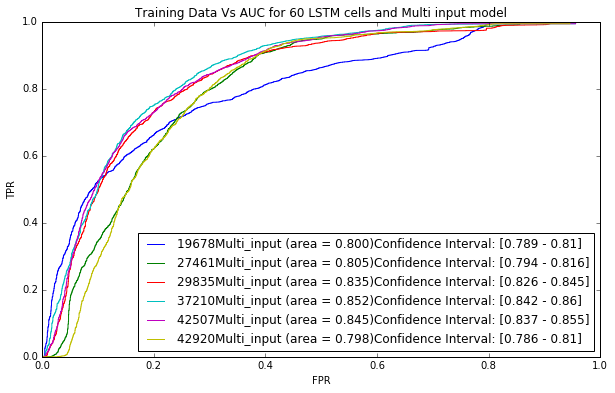

In [9]:
plt.figure(figsize = (10,6))
plt.title("Training Data Vs AUC for 60 LSTM cells and Multi input model")
plt.xlabel("FPR")
plt.ylabel("TPR")
max_ids = [200,300,350,400,450,500]
j = 0
for model in models_60cells[:6]:
    train_data_size = int(model[:5])
    print(train_data_size)
    max_id = max_ids[j]
    j+=1
    print(model)
    train_features_reshaped,test_features_reshaped,train_labels, test_labels, train_features_18, test_features_18 = get_train_test(data,max_id)
    lstm_predicted_labels,ohe,predicted_probs = test_lstm_multi(test_features_reshaped, test_features_18,test_labels.as_matrix(),model_folder_60cells+model)
    fpr,tpr,thresholds = roc_curve(test_labels.as_matrix(), predicted_probs[:,1])
    #precision, recall, thresholds = precision_recall_curve(test_labels.as_matrix(), predicted_probs[:,1])
    print(average_precision_score(test_labels.as_matrix(), predicted_probs[:,1]))
    print("Original ROC area: {:0.3f}".format(roc_auc_score(test_labels, predicted_probs[:,1])))
    n_bootstraps = 100
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    
    y_true = np.array(test_labels)
    y_pred = predicted_probs[:,1]
    
    #print(y_pred.shape)
    #print(y_true.shape)
    

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue
        #print(y_true)
        #print(y_pred)
        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    auc_num = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model[:5]+'Multi_input (area = {:.3f})'.format(auc_num) + "Confidence Interval: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    
    #print(auc_num)
plt.legend(loc='best')
plt.show()

19678
19678_weights.best_10cells.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  70.7768361581921
0.8108740263678471
27461
27461_weights.best_10cells.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  76.17231638418079
0.818912396434103
29835
29835_weights.best_10cells.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  73.10734463276836
0.7962269370550978
37210
37210_weights.best_10cells.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  75.6638418079096
0.809727364109833
42507
42507_weights.best_10cells.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  76.53954802259886
0.8102283205725932
42920
42920_weights.best_10cells.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  76.34180790960453
0.8090821405444487
47512
47512_weights.best_10cells.hdf5
2488/2488 [==============================] - 3s 1ms/step
Accuracy:  85.20900321543408
0.9483286096983345
488

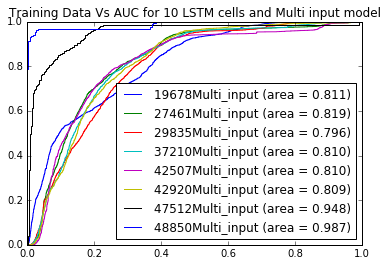

In [9]:
plt.title("Training Data Vs AUC for 10 LSTM cells and Multi input model")
max_ids = [200,300,350,400,450,500,550,650]
i = 0
for model in models_10cells:
    train_data_size = int(model[:5])
    print(train_data_size)
    max_id = max_ids[i]
    i+=1
    print(model)
    train_features_reshaped,test_features_reshaped,train_labels, test_labels, train_features_18, test_features_18 = get_train_test(data,max_id)
    lstm_predicted_labels,ohe,predicted_probs = test_lstm_multi(test_features_reshaped, test_features_18,test_labels.as_matrix(),model_folder_10cells+model)
    fpr,tpr,thresholds = roc_curve(test_labels.as_matrix(), predicted_probs[:,1])
    auc_num = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model[:5]+'Multi_input (area = {:.3f})'.format(auc_num))
    print(auc_num)
plt.legend(loc='best')
plt.show()

19678
19678_weights.best_10cells.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  70.7768361581921
Original ROC area: 0.811


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:31: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


Confidence interval for the score: [0.800 - 0.822]
27461
27461_weights.best_10cells.hdf5
7080/7080 [==============================] - 7s 1ms/step
Accuracy:  76.17231638418079
Original ROC area: 0.819
Confidence interval for the score: [0.809 - 0.829]
29835
29835_weights.best_10cells.hdf5
7080/7080 [==============================] - 7s 1ms/step
Accuracy:  73.10734463276836
Original ROC area: 0.796
Confidence interval for the score: [0.786 - 0.807]
37210
37210_weights.best_10cells.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  75.6638418079096
Original ROC area: 0.810
Confidence interval for the score: [0.799 - 0.819]
42507
42507_weights.best_10cells.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  76.53954802259886
Original ROC area: 0.810
Confidence interval for the score: [0.800 - 0.821]
42920
42920_weights.best_10cells.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  76.34180790960453
Original ROC area: 0.809
C

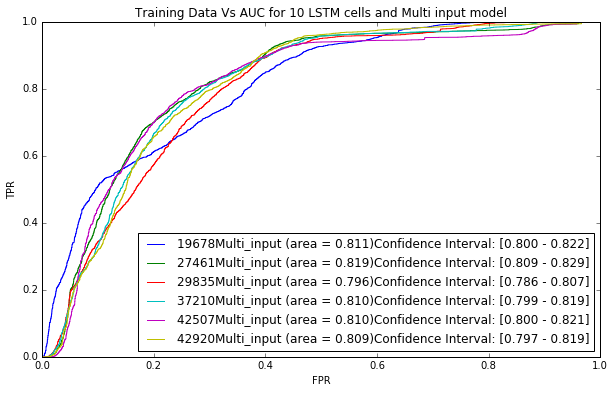

In [12]:
plt.figure(figsize = (10,6))
plt.title("Training Data Vs AUC for 10 LSTM cells and Multi input model")
plt.xlabel("FPR")
plt.ylabel("TPR")
max_ids = [200,300,350,400,450,500]
j = 0
for model in models_10cells[:6]:
    train_data_size = int(model[:5])
    print(train_data_size)
    max_id = max_ids[j]
    j+=1
    print(model)
    train_features_reshaped,test_features_reshaped,train_labels, test_labels, train_features_18, test_features_18 = get_train_test(data,max_id)
    lstm_predicted_labels,ohe,predicted_probs = test_lstm_multi(test_features_reshaped, test_features_18,test_labels.as_matrix(),model_folder_10cells+model)
    fpr,tpr,thresholds = roc_curve(test_labels.as_matrix(), predicted_probs[:,1])
    print("Original ROC area: {:0.3f}".format(roc_auc_score(test_labels, predicted_probs[:,1])))
    n_bootstraps = 100
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    
    y_true = np.array(test_labels)
    y_pred = predicted_probs[:,1]
    
    #print(y_pred.shape)
    #print(y_true.shape)
    

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue
        #print(y_true)
        #print(y_pred)
        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    auc_num = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model[:5]+'Multi_input (area = {:.3f})'.format(auc_num) + "Confidence Interval: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    #print(auc_num)
plt.legend(loc='best')
plt.show()

100cells
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  78.30508474576271
Original ROC area: 0.847


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:33: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


Confidence interval for the score: [0.840 - 0.856]
100cellsMulti_input (area = 0.847)
_20cells
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  78.64406779661017
Original ROC area: 0.840
Confidence interval for the score: [0.829 - 0.851]
_20cellsMulti_input (area = 0.840)
_40cells
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  79.91525423728814
Original ROC area: 0.848
Confidence interval for the score: [0.837 - 0.859]
_40cellsMulti_input (area = 0.848)
_50cells
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  76.37005649717514
Original ROC area: 0.841
Confidence interval for the score: [0.830 - 0.852]
_50cellsMulti_input (area = 0.841)
_60cells
7080/7080 [==============================] - ETA:  - 8s 1ms/step
Accuracy:  76.42655367231639
Original ROC area: 0.798
Confidence interval for the score: [0.786 - 0.81]
_60cellsMulti_input (area = 0.798)


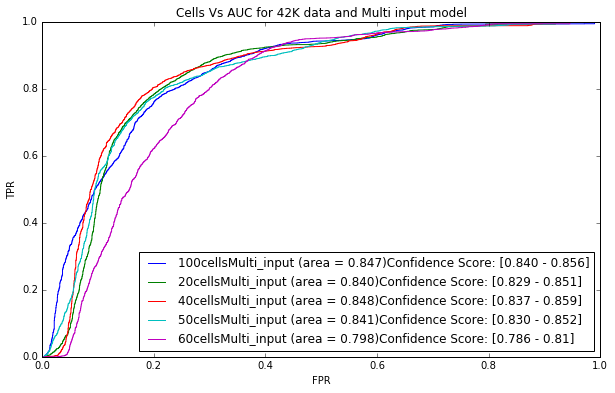

In [14]:
models_42kdata = listdir('multi_input_models_42920/')

max_ids = 500
i = 0
plt.figure(figsize = (10,6))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Cells Vs AUC for 42K data and Multi input model")
for model in models_42kdata:
    
    train_data_size = int(model[:5])
    #print(train_data_size)
    max_id = max_ids
    print(model[-13:-5])
    train_features_reshaped,test_features_reshaped,train_labels, test_labels, train_features_18, test_features_18 = get_train_test(data,max_id)
    lstm_predicted_labels,ohe,predicted_probs = test_lstm_multi(test_features_reshaped, test_features_18,test_labels.as_matrix(),'multi_input_models_42920/'+model)
    fpr,tpr,thresholds = roc_curve(test_labels.as_matrix(), predicted_probs[:,1])
    print("Original ROC area: {:0.3f}".format(roc_auc_score(test_labels, predicted_probs[:,1])))
    n_bootstraps = 100
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    
    y_true = np.array(test_labels)
    y_pred = predicted_probs[:,1]
    
    #print(y_pred.shape)
    #print(y_true.shape)
    

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue
        #print(y_true)
        #print(y_pred)
        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    auc_num = auc(fpr, tpr)
    print(model[-13:-5]+'Multi_input (area = {:.3f})'.format(auc_num))
    if model[-13] == "_":
        label = model[-12:-5]
    else:
        label = model[-13:-5]
    plt.plot(fpr, tpr, label=label+'Multi_input (area = {:.3f})'.format(auc_num) + "Confidence Score: [{:0.3f} - {:0.3}]".format(confidence_lower,confidence_upper))
plt.legend(loc='best')
plt.show()


In [15]:
def test_lstm(test_features, test_labels, pickle_name):
    
    model = load_model(pickle_name)
    
    X = test_features
    y = np.array(test_labels)
    #le = preprocessing.LabelEncoder()
    #y = le.fit_transform(y)

    y = y.reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(y)
    
    #Evaluate the model
    scores = model.evaluate(X, y, verbose=1)
    predicted_labels = model.predict(X)

    print("Accuracy: ", scores[1]*100)

    hot_list = [get_hot_value(sublist) for sublist in predicted_labels]

    #t  = np.array(y)
    #p  = np.array(hot_list)
    #t = np.argmax(t, axis=1)
    #p = np.argmax(p, axis=1)

    #print("Precision: ", precision_score(t, p, average=None))
    
    return hot_list, ohe, predicted_labels

In [16]:
lstmmodel_folder_60cells = 'lstm_models_60cells/'
lstmmodels_60cells = listdir(lstmmodel_folder_60cells)
lstmmodels_60cells

['19678_60LSTMweights.best.hdf5',
 '27461_60LSTMweights.best.hdf5',
 '29835_60LSTMweights.best.hdf5',
 '37210_60LSTMweights.best.hdf5',
 '42507_60LSTMweights.best.hdf5',
 '42920_60LSTMweights.best.hdf5',
 '47512_60LSTMweights.best.hdf5',
 '48850_60LSTMweights.best.hdf5']

19678
19678_60LSTMweights.best.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  74.49152542372882
Original ROC area: 0.709


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:31: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


Confidence interval for the score: [0.696 - 0.723]
27461
27461_60LSTMweights.best.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  74.61864406779661
Original ROC area: 0.740
Confidence interval for the score: [0.730 - 0.75]
29835
29835_60LSTMweights.best.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  75.15536723163841
Original ROC area: 0.777
Confidence interval for the score: [0.765 - 0.786]
37210
37210_60LSTMweights.best.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  74.42090395480227
Original ROC area: 0.758
Confidence interval for the score: [0.746 - 0.769]
42507
42507_60LSTMweights.best.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  73.99717514124293
Original ROC area: 0.823
Confidence interval for the score: [0.812 - 0.832]
42920
42920_60LSTMweights.best.hdf5
7080/7080 [==============================] - 8s 1ms/step
Accuracy:  74.2231638418079
Original ROC area: 0.671
Confidence i

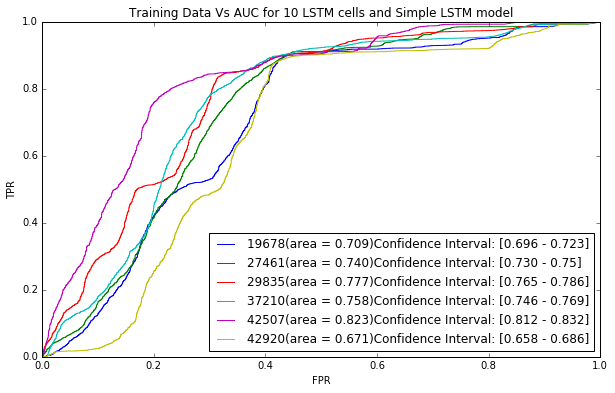

In [19]:
plt.figure(figsize = (10,6))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Training Data Vs AUC for 10 LSTM cells and Simple LSTM model")
max_ids = [200,300,350,400,450,500]
j = 0
for model in lstmmodels_60cells[:6]:
    train_data_size = int(model[:5])
    print(train_data_size)
    max_id = max_ids[j]
    j+=1
    print(model)
    train_features_reshaped,test_features_reshaped,train_labels, test_labels, train_features_18, test_features_18 = get_train_test(data,max_id)
    lstm_predicted_labels,ohe,predicted_probs = test_lstm(test_features_reshaped,test_labels.as_matrix(),lstmmodel_folder_60cells+model)
    fpr,tpr,thresholds = roc_curve(test_labels.as_matrix(), predicted_probs[:,1])
    print("Original ROC area: {:0.3f}".format(roc_auc_score(test_labels, predicted_probs[:,1])))
    n_bootstraps = 100
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    
    y_true = np.array(test_labels)
    y_pred = predicted_probs[:,1]
    
    #print(y_pred.shape)
    #print(y_true.shape)
    

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue
        #print(y_true)
        #print(y_pred)
        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    auc_num = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model[:5]+'(area = {:.3f})'.format(auc_num) + "Confidence Interval: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    #print(auc_num)
plt.legend(loc='best')
plt.show()